In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

In [11]:
data = pd.read_csv("Base_donnees.csv", sep=",")

In [12]:
data.head()

,Unnamed: 0,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche
0,0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110,2.0,-10 ans,22.40,Arrow,Serie TV,100,3.0,-10 ans,24.4
1,1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100,0.0,Tout public,13.1
2,2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115,0.0,Tout public,23.36,Le comte Ory,Opera,144,0.0,Tout public,12
3,3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110,0.0,Tout public,22.45,9 mois ferme,Film,80,0.0,Tout public,NaN
4,4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49,0.0,Tout public,2.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48552 entries, 0 to 48551
Data columns (total 17 columns):
Unnamed: 0             48552 non-null int64
Date                   48552 non-null object
Jour                   47960 non-null object
Chaine                 48546 non-null object
Heure_prgm1            47960 non-null float64
Titre_prgm1            47270 non-null object
Type_prgm1             47268 non-null object
Duree_prgm1            47960 non-null object
Nbre_episodes_prgm1    47960 non-null float64
Age_conseille_prgm1    47960 non-null object
Heure_prgm2            47960 non-null object
Titre_prgm2            47566 non-null object
Type_prgm2             47561 non-null object
Duree_prgm2            47960 non-null object
Nbre_episodes_prgm2    47960 non-null float64
Age_conseille_prgm2    47960 non-null object
Part_de_marche         32150 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 6.3+ MB


## Gestion unnamed

In [5]:
data = data.drop(data.columns[0],axis='columns')

## Gestion date

In [6]:
def annee(string):
    parts = string.split(' ')
    return parts[2]
def mois(string):
    parts = string.split(' ')
    return parts[1]

In [7]:
data['Annee'] = data['Date']
data['Annee'] = data['Annee'].apply(annee)
data['Mois'] = data['Date']
data['Mois'] = data['Mois'].apply(mois)

In [8]:
data.head()

,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche,Annee,Mois
0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110,2.0,-10 ans,22.40,Arrow,Serie TV,100,3.0,-10 ans,24.4,2014,octobre
1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100,0.0,Tout public,13.1,2014,octobre
2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115,0.0,Tout public,23.36,Le comte Ory,Opera,144,0.0,Tout public,12,2014,octobre
3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110,0.0,Tout public,22.45,9 mois ferme,Film,80,0.0,Tout public,NaN,2014,octobre
4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49,0.0,Tout public,2.6,2014,octobre


## Gestion Jour (week-end ou non ?)

In [9]:
def weekend(string):
    if string == 'samedi' or string == 'dimanche':
        D = 1
    else:
        D = 0
    return D

In [10]:
data['Week end'] = data['Jour']
data['Week end'] = data['Week end'].apply(weekend)

## Gestion chaîne

In [13]:
def Tableau_freq(effectifs):
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = ["Programme"]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = (tab["n"] / len(data))*100 # len(data) renvoie la taille de l'échantillon
    return tab

In [12]:
effectifs = data["Chaine"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,RMC Decouverte,1962,4.041028
1,France 4,1961,4.038969
2,Arte,1960,4.036909
3,M6,1960,4.036909
4,TMC,1960,4.036909
5,France 3,1959,4.034849
6,France 5,1958,4.032790
7,France 2,1957,4.030730
8,C8,1956,4.028670
9,TF1,1956,4.028670


RTL 9 et l'autre apparaissent très peu de fois, on les enlève.

In [13]:
data = data.drop(data[data.Chaine == 'RTL 9'].index)
data = data.drop(data[data.Chaine == '35_" hr'].index)

In [14]:
effectifs = data["Chaine"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,RMC Decouverte,1962,4.053803
1,France 4,1961,4.051737
2,Arte,1960,4.049670
3,M6,1960,4.049670
4,TMC,1960,4.049670
5,France 3,1959,4.047604
6,France 5,1958,4.045538
7,France 2,1957,4.043472
8,TF1,1956,4.041406
9,C8,1956,4.041406


## Gestion heure programme

In [15]:
effectifs = data["Heure_prgm1"].value_counts()
tab = Tableau_freq(effectifs)

In [16]:
tab.to_csv('heure prog.csv',index=False)

## Gestion type programme

In [7]:
effectifs = data["Type_prgm2"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,Magazine,14001,28.837123
1,Serie TV,8151,16.788186
2,Documentaire,7354,15.146647
3,Film,6324,13.025210
4,Telefilm,3897,8.026446
5,Divertissement,2105,4.335558
6,Information,1459,3.005026
7,Telerealitee,1378,2.838194
8,Spectacle,643,1.324353
9,Talk-Show,529,1.089553


In [18]:
def Prog(string):
    if string == 'Telerealitee' or string == 'Jeu' or string == 'Spectacle' or string == 'Concert' or string == 'Theatre' or string == 'Dessin-anime' or string == 'Ceremonie' or string == 'Gala' or string == 'Opera' or string == 'Clips' or string == 'Talk-Show' or string == 'Danse' or string == 'Musique' or string == 'Ballet':
        P = 'Divertissement'
    elif string == 'Reportage' or string == 'Making-of':
        P = 'Magazine'
    elif string == 'Journal' or string == 'Debat':
        P = 'Information'
    else:
        P = string
    return P

In [19]:
data['Type_prgm1'] = data['Type_prgm1'].apply(Prog)
data['Type_prgm2'] = data['Type_prgm2'].apply(Prog)

In [20]:
data = data.drop(data[data.Type_prgm1 == 'Court-metrage'].index)
data = data.drop(data[data.Type_prgm1 == 'Programme Court'].index)
data = data.drop(data[data.Type_prgm2 == 'Court-metrage'].index)
data = data.drop(data[data.Type_prgm2 == 'Programme Court'].index)
data = data.drop(data[data.Type_prgm2 == 'Emission religieuse'].index)
data = data.drop(data[data.Type_prgm2 == 'Fin des emissions'].index)

In [21]:
effectifs = data["Type_prgm1"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,Serie TV,10160,21.015182
1,Film,9718,20.100939
2,Magazine,8891,18.390353
3,Documentaire,6363,13.161378
4,Divertissement,5035,10.414512
5,Telefilm,3622,7.491830
6,Sport,2135,4.416084
7,Information,1156,2.391098


In [22]:
effectifs = data["Type_prgm2"].value_counts()
Tableau_freq(effectifs)

,Programme,n,f
0,Magazine,14012,28.982749
1,Serie TV,8143,16.843172
2,Documentaire,7354,15.211186
3,Film,6205,12.834567
4,Divertissement,5511,11.399082
5,Telefilm,3890,8.046167
6,Information,1887,3.903115
7,Sport,370,0.765317


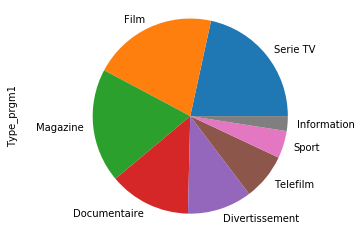

In [23]:
data["Type_prgm1"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

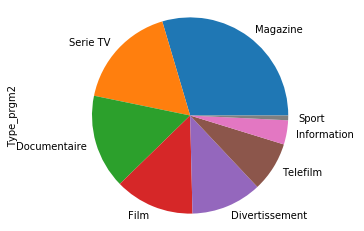

In [24]:
data["Type_prgm2"].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

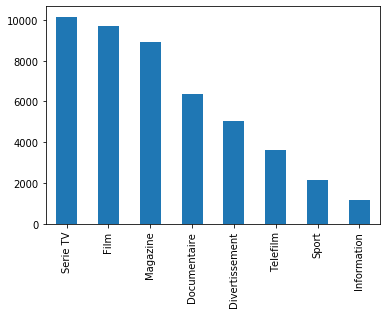

In [25]:
data["Type_prgm1"].value_counts().plot(kind='bar')
plt.show()

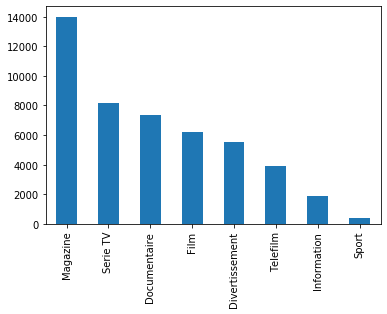

In [26]:
data["Type_prgm2"].value_counts().plot(kind='bar')
plt.show()

## Gestion duree programme

In [12]:
def Duree_prog(string):
    parts = string.split(' ')
    if string == "nan":
        return np.nan
    else:
        return parts[0]

In [13]:
data['Duree_prgm2'] = data['Duree_prgm2'].astype(str)
data['Duree_prgm2'] = data['Duree_prgm2'].apply(Duree_prog)
data

,Unnamed: 0,Date,Jour,Chaine,Heure_prgm1,Titre_prgm1,Type_prgm1,Duree_prgm1,Nbre_episodes_prgm1,Age_conseille_prgm1,Heure_prgm2,Titre_prgm2,Type_prgm2,Duree_prgm2,Nbre_episodes_prgm2,Age_conseille_prgm2,Part_de_marche
0,0,08 octobre 2014,mercredi,TF1,20.55,Blacklist,Serie TV,110,2.0,-10 ans,22.40,Arrow,Serie TV,100,3.0,-10 ans,24.4
1,1,08 octobre 2014,mercredi,France 2,20.50,Les hommes de l'ombre,Serie TV,120,2.0,Tout public,22.40,Un soir à la tour Eiffel,Magazine,100,0.0,Tout public,13.1
2,2,08 octobre 2014,mercredi,France 3,20.45,Des racines et des ailes,Magazine,115,0.0,Tout public,23.36,Le comte Ory,Opera,144,0.0,Tout public,12
3,3,08 octobre 2014,mercredi,Canal +,20.55,Diana,Film,110,0.0,Tout public,22.45,9 mois ferme,Film,80,0.0,Tout public,NaN
4,4,08 octobre 2014,mercredi,France 5,20.40,La maison France 5,Magazine,60,0.0,Tout public,21.40,"Silence, ça pousse !",Magazine,49,0.0,Tout public,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48547,48547,17 juin 2019,NaN,"35_"" hr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48548,48548,18 juin 2019,NaN,"35_"" hr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48549,48549,30 juin 2019,NaN,"35_"" hr",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48550,48550,28 juillet 2019,NaN,Gulli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5


In [14]:
effectifs = data["Duree_prgm2"].value_counts()
tab = Tableau_freq(effectifs)
tab.to_csv('duree prog.csv',index=False)

In [11]:
def Duree_prog_na(duree):
    if duree == "nan":
        return np.nan
    return duree

In [31]:
data['Duree_prgm1'] = data['Duree_prgm1'].apply(Duree_prog_na)
print(data['Duree_prgm1'].isna().sum())
data['Duree_prgm2'] = data['Duree_prgm2'].apply(Duree_prog_na)
print(data['Duree_prgm2'].isna().sum())

575
575


In [33]:
for cat in data["Type_prgm2"].unique():
    subset = data[data.Type_prgm1 == cat] # Création du sous-échantillon
    print("-"*20)
    print(cat)
    print("moy:\n",subset['Duree_prgm2'].mean())
    print("med:\n",subset['Duree_prgm2'].median())
    print("mod:\n",subset['Duree_prgm2'].mode())
    subset["Duree_prgm1"].hist() # Crée l'histogramme
    plt.show() # Affiche l'histogramme

--------------------
Serie TV


TypeError: Could not convert 100100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 80 120Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm280 11011090 Suite prgm2Suite prgm2Suite prgm211010045 110400290Suite prgm2Suite prgm215060 Suite prgm2Suite prgm280 100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 90 120Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm255 Suite prgm2100Suite prgm212090 Suite prgm2110Suite prgm210080 25 65 Suite prgm2120380305Suite prgm2Suite prgm216065 Suite prgm2Suite prgm2100100Suite prgm2Suite prgm2Suite prgm2190Suite prgm250 90 60 Suite prgm2110Suite prgm2Suite prgm2Suite prgm255 105Suite prgm2100Suite prgm2120Suite prgm280 Suite prgm290 11080 60 90 14040032511015070 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2100Suite prgm245 90 30 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm290 95 90 Suite prgm2100Suite prgm2120Suite prgm2Suite prgm2Suite prgm210011080 90 75 40531011015040 120Suite prgm2Suite prgm217090 Suite prgm2Suite prgm210045 90 Suite prgm230 Suite prgm2Suite prgm285 Suite prgm2Suite prgm2Suite prgm245 14010514 Suite prgm2120Suite prgm2120Suite prgm2Suite prgm2Suite prgm210010090 60 100405330150130Suite prgm2Suite prgm2Suite prgm290 100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 130Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 140Suite prgm290 Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm212510075 55 Suite prgm225570 Suite prgm2Suite prgm2Suite prgm2Suite prgm2100420Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm2140Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2Suite prgm290 Suite prgm2100Suite prgm2120Suite prgm2Suite prgm2Suite prgm213012510010055 Suite prgm2405Suite prgm211016075 100Suite prgm2110Suite prgm242080 100Suite prgm2Suite prgm245 45 85 16055 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm255 Suite prgm2Suite prgm295 Suite prgm245 Suite prgm2120Suite prgm218094 10013512012090 90 55 11011040540527527511011017070 Suite prgm2Suite prgm2Suite prgm2110120100420Suite prgm290 Suite prgm2Suite prgm2Suite prgm245 16055 Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm2Suite prgm2150Suite prgm2100Suite prgm210014011080 55 100410305Suite prgm2160Suite prgm2Suite prgm2Suite prgm2100120Suite prgm2420Suite prgm2Suite prgm2Suite prgm2Suite prgm210055 10555 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2280120Suite prgm2120Suite prgm2140Suite prgm2Suite prgm211510080 55 70 405345Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2420Suite prgm2Suite prgm2Suite prgm210045 95 60 120Suite prgm295 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2120115Suite prgm2Suite prgm285 395310Suite prgm2Suite prgm2Suite prgm2Suite prgm2205Suite prgm2Suite prgm260 70 Suite prgm210060 355Suite prgm2100Suite prgm2Suite prgm250 Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2105Suite prgm2110Suite prgm290 Suite prgm290 105405260Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100100120120Suite prgm2Suite prgm2Suite prgm2Suite prgm2100100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120120Suite prgm2100100Suite prgm2Suite prgm2Suite prgm2Suite prgm2115115105105Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm295 110110Suite prgm255 41060 11090 Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 55 Suite prgm2Suite prgm265 100Suite prgm295 Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2110Suite prgm295 Suite prgm290 340115Suite prgm2Suite prgm2Suite prgm2Suite prgm289 Suite prgm211512010085 55 405Suite prgm211090 Suite prgm2Suite prgm2100120130Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210050 Suite prgm260 110Suite prgm290 90 Suite prgm2130110Suite prgm2Suite prgm2100Suite prgm2105Suite prgm2340130105Suite prgm2Suite prgm2Suite prgm2104Suite prgm2115Suite prgm210040 55 410Suite prgm290 80 Suite prgm2Suite prgm2Suite prgm2120120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210055 Suite prgm285 120Suite prgm2125Suite prgm2Suite prgm2140Suite prgm275 Suite prgm2Suite prgm2105Suite prgm2335Suite prgm2105Suite prgm2Suite prgm255 94 Suite prgm2110110Suite prgm210055 400Suite prgm210074 Suite prgm2Suite prgm2Suite prgm2120170Suite prgm2Suite prgm2Suite prgm2Suite prgm290 50 Suite prgm211060 120Suite prgm285 Suite prgm2Suite prgm2210Suite prgm250 60 Suite prgm2Suite prgm2105Suite prgm2340Suite prgm2210Suite prgm290 55 99 Suite prgm2140105Suite prgm290 Suite prgm255 65 41060 90 100187Suite prgm2Suite prgm280 120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm210060 55 Suite prgm2Suite prgm2Suite prgm2140Suite prgm280 60 Suite prgm2Suite prgm295 Suite prgm2340Suite prgm2Suite prgm2Suite prgm290 Suite prgm299 Suite prgm2135100Suite prgm290 Suite prgm255 65 19060 110Suite prgm2125Suite prgm2Suite prgm280 115Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm285 55 55 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm265 210Suite prgm2Suite prgm2340Suite prgm2Suite prgm2Suite prgm2100Suite prgm294 Suite prgm2Suite prgm210090 80 55 70 42050 110Suite prgm2105Suite prgm2Suite prgm290 120Suite prgm2Suite prgm2Suite prgm2115Suite prgm250 Suite prgm295 60 Suite prgm290 Suite prgm2Suite prgm2200Suite prgm2Suite prgm290 Suite prgm2340295Suite prgm2Suite prgm2Suite prgm2114Suite prgm213510010580 95 65 42030 110Suite prgm275 Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm211065 95 Suite prgm290 Suite prgm2Suite prgm2190Suite prgm260 105Suite prgm2100Suite prgm2340290Suite prgm2Suite prgm2120Suite prgm2114114Suite prgm2Suite prgm2115115110110Suite prgm290 90 10010065 65 38538550 50 110110Suite prgm2Suite prgm265 65 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 12512060 85 Suite prgm295 Suite prgm2Suite prgm2200Suite prgm2150Suite prgm2Suite prgm2Suite prgm2340315Suite prgm2170Suite prgm294 Suite prgm211010570 80 41050 110350Suite prgm280 90 50 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2355Suite prgm250 14012060 60 Suite prgm290 Suite prgm255 Suite prgm2150Suite prgm255 Suite prgm2105Suite prgm2335100Suite prgm2120Suite prgm299 Suite prgm2110115Suite prgm290 11560 39540 100Suite prgm255 Suite prgm2Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2345Suite prgm250 Suite prgm295 65 55 Suite prgm290 Suite prgm2Suite prgm2130Suite prgm265 95 Suite prgm2100Suite prgm2Suite prgm2Suite prgm295 110Suite prgm290 90 55 60 40550 120Suite prgm2Suite prgm2Suite prgm2Suite prgm2115Suite prgm2Suite prgm2Suite prgm2Suite prgm260 Suite prgm290 18065 11595 Suite prgm295 Suite prgm2Suite prgm217050 60 95 Suite prgm290 Suite prgm2120Suite prgm2Suite prgm2170105Suite prgm210080 55 50 Suite prgm2Suite prgm285 Suite prgm2Suite prgm2110115Suite prgm2Suite prgm2Suite prgm210050 Suite prgm211560 55 50 Suite prgm295 10050 Suite prgm2180Suite prgm240 110Suite prgm255 Suite prgm2130Suite prgm211094 Suite prgm2160100Suite prgm280 90 55 41050 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm210050 Suite prgm290 60 50 60 Suite prgm290 90 55 Suite prgm2Suite prgm2Suite prgm2Suite prgm210595 Suite prgm2Suite prgm2Suite prgm2130Suite prgm211089 Suite prgm2150100Suite prgm290 80 55 12050 Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm211050 Suite prgm210060 40 Suite prgm290 90 50 Suite prgm2Suite prgm2Suite prgm270 95 Suite prgm2Suite prgm2Suite prgm2130Suite prgm211094 Suite prgm2145105Suite prgm290 40 40540 Suite prgm2Suite prgm2Suite prgm2100120Suite prgm2Suite prgm2Suite prgm2Suite prgm210045 90 60 40 Suite prgm290 100Suite prgm2Suite prgm255 55 130Suite prgm2Suite prgm2Suite prgm2130Suite prgm211094 Suite prgm215585 Suite prgm2Suite prgm290 55 70 400Suite prgm2Suite prgm210040 110120Suite prgm2Suite prgm2Suite prgm2Suite prgm210045 10060 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2185130Suite prgm211089 Suite prgm2110120Suite prgm2Suite prgm211080 55 405110Suite prgm2Suite prgm275 40 110120Suite prgm2Suite prgm2Suite prgm2Suite prgm245 12060 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2135120Suite prgm279 Suite prgm2150105Suite prgm210090 55 410Suite prgm2Suite prgm2Suite prgm275 Suite prgm2Suite prgm2100120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 13060 100Suite prgm2Suite prgm295 100Suite prgm2Suite prgm250 Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2145115Suite prgm211080 90 65 405300Suite prgm290 75 Suite prgm2Suite prgm2100120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 90 90 60 55 Suite prgm295 100Suite prgm2Suite prgm260 Suite prgm250 335Suite prgm295 90 Suite prgm2104Suite prgm2Suite prgm2105Suite prgm210010055 405Suite prgm2Suite prgm2100Suite prgm2Suite prgm2100125Suite prgm2Suite prgm2Suite prgm2Suite prgm250 11090 55 50 Suite prgm2Suite prgm290 100Suite prgm2Suite prgm255 Suite prgm2Suite prgm295 90 Suite prgm2Suite prgm2Suite prgm215090 Suite prgm2Suite prgm275 55 400330105100Suite prgm250 100120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 10080 60 55 Suite prgm290 100Suite prgm2Suite prgm250 Suite prgm2Suite prgm214014090 Suite prgm2Suite prgm2Suite prgm215095 Suite prgm2Suite prgm211555 395300Suite prgm2Suite prgm2Suite prgm250 100Suite prgm2Suite prgm2Suite prgm2Suite prgm211045 65 60 50 Suite prgm2Suite prgm290 100Suite prgm2Suite prgm240 65 Suite prgm2Suite prgm211590 Suite prgm2130119Suite prgm2120110Suite prgm2Suite prgm275 55 410Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm285 Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm295 12050 Suite prgm290 100Suite prgm2Suite prgm250 55 110Suite prgm2135Suite prgm280 Suite prgm211064 85 125100105Suite prgm2Suite prgm260 400400Suite prgm2Suite prgm290 Suite prgm2355Suite prgm295 Suite prgm2420Suite prgm2Suite prgm245 Suite prgm2130110Suite prgm2Suite prgm2110Suite prgm2Suite prgm2120120100Suite prgm2140Suite prgm2180110Suite prgm289 105Suite prgm214590 Suite prgm2Suite prgm213560 100Suite prgm2210Suite prgm290 Suite prgm2Suite prgm210010095 95 Suite prgm2Suite prgm2420420Suite prgm2Suite prgm2Suite prgm2Suite prgm290 45 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm240 59 Suite prgm2110Suite prgm2340Suite prgm213090 Suite prgm294 90 Suite prgm211090 120Suite prgm2Suite prgm2Suite prgm255 35595 90 110Suite prgm2110150Suite prgm242050 Suite prgm2100Suite prgm245 Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm250 70 Suite prgm2Suite prgm2340Suite prgm210080 10020085 50 Suite prgm290 110Suite prgm2Suite prgm2Suite prgm255 Suite prgm2Suite prgm290 110Suite prgm2Suite prgm2105Suite prgm242045 Suite prgm2Suite prgm245 Suite prgm2Suite prgm255 85 Suite prgm2110Suite prgm2Suite prgm212040 Suite prgm2100Suite prgm2325Suite prgm2Suite prgm280 Suite prgm290 105Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm255 400345Suite prgm210075 Suite prgm2Suite prgm2100105Suite prgm242050 Suite prgm2120Suite prgm280 Suite prgm2Suite prgm2Suite prgm2Suite prgm2115Suite prgm250 340Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2335Suite prgm2Suite prgm290 Suite prgm285 110360Suite prgm2190Suite prgm2Suite prgm2Suite prgm2Suite prgm255 125Suite prgm219090 55 Suite prgm2Suite prgm2Suite prgm2110110Suite prgm242045 Suite prgm2Suite prgm2Suite prgm260 Suite prgm211090 110Suite prgm2340Suite prgm2Suite prgm2100Suite prgm2Suite prgm290 100Suite prgm2Suite prgm2345180Suite prgm270 Suite prgm264 100Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm250 405330Suite prgm250 Suite prgm2Suite prgm2Suite prgm2110Suite prgm2145Suite prgm242050 Suite prgm2Suite prgm295 60 Suite prgm2Suite prgm250 120Suite prgm255 360Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2340105Suite prgm280 Suite prgm210990 Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2100330Suite prgm2100Suite prgm2Suite prgm2Suite prgm2100Suite prgm2140Suite prgm242045 Suite prgm2Suite prgm2Suite prgm250 Suite prgm2110100Suite prgm2335Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 94 Suite prgm2340Suite prgm290 Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 180329Suite prgm2Suite prgm2Suite prgm211090 Suite prgm2Suite prgm242045 Suite prgm2Suite prgm260 Suite prgm2105250Suite prgm2100Suite prgm2350Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm290 Suite prgm2330Suite prgm280 Suite prgm2Suite prgm2100Suite prgm2110Suite prgm2Suite prgm2Suite prgm255 100345Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm242055 Suite prgm245 Suite prgm2180Suite prgm2Suite prgm285 Suite prgm2315Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2360135Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2200Suite prgm2Suite prgm255 40 Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm2100Suite prgm240 Suite prgm211045 Suite prgm223010085 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2140Suite prgm2150Suite prgm2Suite prgm2Suite prgm2105Suite prgm210012055 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110100Suite prgm245 Suite prgm210040 Suite prgm216080 15080 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2115Suite prgm2Suite prgm2Suite prgm2Suite prgm2140Suite prgm2Suite prgm2Suite prgm2Suite prgm250 70 40 Suite prgm2Suite prgm270 95 65 Suite prgm2Suite prgm2100100Suite prgm250 Suite prgm295 10045 Suite prgm270 90 80 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2155Suite prgm2Suite prgm2Suite prgm212060 Suite prgm2334Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm245 Suite prgm2Suite prgm2Suite prgm240 Suite prgm216060 80 88 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm265 Suite prgm2Suite prgm2Suite prgm2Suite prgm2115Suite prgm2Suite prgm295 55 65 Suite prgm2Suite prgm2Suite prgm280 Suite prgm260 Suite prgm2100100Suite prgm245 Suite prgm2Suite prgm285 60 60 Suite prgm295 Suite prgm2Suite prgm2120Suite prgm2Suite prgm260 Suite prgm2Suite prgm245 Suite prgm2Suite prgm2Suite prgm2160Suite prgm290 80 55 70 130Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm245 Suite prgm2Suite prgm240 12060 Suite prgm2100Suite prgm2Suite prgm2Suite prgm222012090 89 Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2Suite prgm2155Suite prgm280 10055 65 Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm290 90 Suite prgm250 Suite prgm211040 90 60 52 100Suite prgm2Suite prgm2160Suite prgm290 95 Suite prgm220050 Suite prgm2Suite prgm2Suite prgm2140Suite prgm290 95 55 65 Suite prgm2Suite prgm2Suite prgm2128Suite prgm290 95 Suite prgm2Suite prgm2Suite prgm211045 12060 55 110Suite prgm2120Suite prgm2110Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm245 110Suite prgm2Suite prgm2Suite prgm2160Suite prgm211057 55 Suite prgm2Suite prgm2Suite prgm2120Suite prgm210095 Suite prgm2Suite prgm2Suite prgm211040 10060 100110Suite prgm2Suite prgm2100Suite prgm211089 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm211095 60 Suite prgm2Suite prgm2Suite prgm2115Suite prgm290 Suite prgm250 Suite prgm2Suite prgm245 Suite prgm290 60 90 11090 Suite prgm2Suite prgm2100Suite prgm2115100Suite prgm2Suite prgm2Suite prgm2Suite prgm2110110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210080 55 345Suite prgm2Suite prgm289 Suite prgm2Suite prgm2Suite prgm250 Suite prgm2Suite prgm2105Suite prgm210065 118Suite prgm290 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2220100100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm211060 100Suite prgm2Suite prgm2Suite prgm250 Suite prgm290 110Suite prgm245 Suite prgm2Suite prgm2100Suite prgm210560 78 Suite prgm290 Suite prgm2Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm211015090 Suite prgm2Suite prgm2Suite prgm2Suite prgm210011550 370Suite prgm2Suite prgm270 Suite prgm255 Suite prgm2Suite prgm2110Suite prgm245 Suite prgm2Suite prgm211510560 78 Suite prgm290 Suite prgm2Suite prgm211045 Suite prgm294 Suite prgm2Suite prgm2Suite prgm2Suite prgm250 98 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm211055 55 355Suite prgm290 90 100100Suite prgm2Suite prgm255 55 Suite prgm2Suite prgm2Suite prgm2110Suite prgm245 Suite prgm2Suite prgm211585 60 78 Suite prgm2Suite prgm2Suite prgm245 Suite prgm295 Suite prgm2Suite prgm2100Suite prgm2100Suite prgm285 110Suite prgm210080 55 33911055 Suite prgm255 Suite prgm2Suite prgm2105Suite prgm245 Suite prgm2Suite prgm290 110Suite prgm2168Suite prgm285 Suite prgm2Suite prgm245 Suite prgm294 Suite prgm2Suite prgm2Suite prgm2100Suite prgm290 110Suite prgm2120Suite prgm255 354100100Suite prgm255 Suite prgm2Suite prgm250 Suite prgm290 13510090 170Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2330285Suite prgm250 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2349110Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2105Suite prgm2Suite prgm2160Suite prgm265 Suite prgm2100Suite prgm2Suite prgm250 140Suite prgm2Suite prgm295 Suite prgm2Suite prgm290 Suite prgm2Suite prgm290 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm2100100Suite prgm2Suite prgm2200200Suite prgm2Suite prgm2Suite prgm2Suite prgm295 55 90 12089 Suite prgm2330Suite prgm2110100120Suite prgm2100Suite prgm212050 210Suite prgm210010055 Suite prgm2Suite prgm250 Suite prgm210090 Suite prgm295 10085 95 Suite prgm2Suite prgm2Suite prgm265 Suite prgm2Suite prgm2Suite prgm294 Suite prgm2315315Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm211050 55 45 Suite prgm210090 10022060 55 90 Suite prgm211050 Suite prgm211090 140Suite prgm2Suite prgm290 90 Suite prgm2Suite prgm2Suite prgm2115Suite prgm2Suite prgm2Suite prgm289 Suite prgm233065 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm280 Suite prgm211080 55 Suite prgm210011080 10060 55 90 Suite prgm210050 Suite prgm210090 Suite prgm2100Suite prgm289 90 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2105104Suite prgm2325310Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm211080 55 Suite prgm211045 80 10055 90 10090 45 Suite prgm2Suite prgm290 Suite prgm295 Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2115Suite prgm2Suite prgm2Suite prgm289 Suite prgm2330300Suite prgm2Suite prgm2Suite prgm2Suite prgm270 Suite prgm2Suite prgm2Suite prgm286 Suite prgm212050 55 36510090 10060 90 170Suite prgm2Suite prgm2Suite prgm290 Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm2Suite prgm2Suite prgm284 Suite prgm233075 Suite prgm2Suite prgm2Suite prgm2Suite prgm295 270Suite prgm2Suite prgm2105Suite prgm290 Suite prgm255 295Suite prgm211075 110110Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2105Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm2Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2Suite prgm270 Suite prgm2Suite prgm2Suite prgm2100Suite prgm212085 60 Suite prgm2Suite prgm211075 Suite prgm210090 110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110150100100Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130160Suite prgm2Suite prgm2120Suite prgm290 55 55 Suite prgm2Suite prgm211075 Suite prgm2Suite prgm2110110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2110110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm284 Suite prgm2Suite prgm290 Suite prgm2120Suite prgm2Suite prgm290 Suite prgm2110110Suite prgm2Suite prgm2Suite prgm2Suite prgm2100100115115Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm285 Suite prgm285 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm298 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm285 200Suite prgm2Suite prgm2Suite prgm255 315Suite prgm250 Suite prgm2Suite prgm290 110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm211060 Suite prgm2Suite prgm295 Suite prgm2Suite prgm221075 Suite prgm298 Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2115Suite prgm211040 55 330Suite prgm211075 Suite prgm285 Suite prgm290 110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm295 Suite prgm285 60 Suite prgm2Suite prgm290 Suite prgm2Suite prgm210055 Suite prgm211094 Suite prgm2Suite prgm2Suite prgm2130Suite prgm284 Suite prgm2110Suite prgm211050 55 330Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2200100110Suite prgm2Suite prgm2Suite prgm2Suite prgm265 Suite prgm212055 Suite prgm250 119Suite prgm2Suite prgm2Suite prgm2140Suite prgm260 Suite prgm294 Suite prgm2Suite prgm2Suite prgm211514084 110Suite prgm210055 55 70 315Suite prgm275 Suite prgm2160100Suite prgm2Suite prgm2100240Suite prgm2Suite prgm2Suite prgm260 Suite prgm2Suite prgm255 Suite prgm255 88 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2Suite prgm2109Suite prgm2Suite prgm245 10015090 Suite prgm280 Suite prgm2110Suite prgm255 295Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 12550 Suite prgm298 100Suite prgm2Suite prgm260 55 90 Suite prgm2Suite prgm2Suite prgm280 50 Suite prgm2Suite prgm299 Suite prgm2Suite prgm290 70 15075 Suite prgm285 Suite prgm211055 55 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 10530050 Suite prgm210074 100Suite prgm285 60 95 55 Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm294 Suite prgm2Suite prgm280 45 140100Suite prgm2100Suite prgm210045 55 280Suite prgm212080 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 25050 Suite prgm211010054 100Suite prgm213555 90 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm240 90 14095 Suite prgm290 320110Suite prgm255 65 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2Suite prgm290 10511050 Suite prgm232010054 60 Suite prgm290 50 120Suite prgm2Suite prgm2Suite prgm245 120Suite prgm2Suite prgm2Suite prgm2Suite prgm210013075 75 Suite prgm2Suite prgm210510532532511055 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210011011040 Suite prgm233074 95 11050 95 Suite prgm2Suite prgm2Suite prgm213088 Suite prgm2Suite prgm2Suite prgm2105Suite prgm290 130110Suite prgm211531511050 40 Suite prgm2100270Suite prgm212080 55 Suite prgm2Suite prgm290 11511045 40 Suite prgm231590 90 Suite prgm290 90 55 95 Suite prgm2Suite prgm2Suite prgm2120115Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm212095 Suite prgm290 320110Suite prgm255 Suite prgm2275Suite prgm212080 65 Suite prgm2Suite prgm2110110110Suite prgm212045 Suite prgm2Suite prgm231511080 Suite prgm275 50 95 Suite prgm2Suite prgm2Suite prgm270 120Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2100120Suite prgm290 330Suite prgm254 70 Suite prgm2200110115Suite prgm2Suite prgm210090 11050 190Suite prgm211511090 Suite prgm211010050 50 120Suite prgm2Suite prgm2Suite prgm280 50 120135Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm2120Suite prgm290 32055 125Suite prgm2Suite prgm2110110140Suite prgm210095 11045 40 Suite prgm2315110105Suite prgm290 Suite prgm245 50 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm280 55 Suite prgm212011075 105Suite prgm212090 Suite prgm250 Suite prgm2315120Suite prgm2100Suite prgm255 80 Suite prgm2Suite prgm2Suite prgm2Suite prgm2120315Suite prgm2Suite prgm2Suite prgm260 Suite prgm2125Suite prgm2100Suite prgm2Suite prgm295 55 Suite prgm212055 Suite prgm2210130Suite prgm2100Suite prgm250 Suite prgm231511040 80 50 Suite prgm2Suite prgm2Suite prgm2Suite prgm2120315Suite prgm2Suite prgm2Suite prgm295 95 90 Suite prgm2Suite prgm2Suite prgm255 Suite prgm2Suite prgm2110220Suite prgm2Suite prgm210050 325Suite prgm285 Suite prgm214055 80 Suite prgm290 Suite prgm2Suite prgm290 315Suite prgm250 Suite prgm280 10095 90 Suite prgm2Suite prgm255 Suite prgm290 12690 Suite prgm2Suite prgm210590 50 320110Suite prgm2Suite prgm2180Suite prgm295 120120Suite prgm2Suite prgm275 75 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 45 325325Suite prgm2Suite prgm230 80 10085 10055 Suite prgm2Suite prgm2Suite prgm255 Suite prgm210512085 210Suite prgm2Suite prgm221042550 320Suite prgm216090 Suite prgm2120Suite prgm280 11070 320Suite prgm2335165Suite prgm218075 120Suite prgm2110Suite prgm255 Suite prgm2Suite prgm212010511021095 Suite prgm212042050 95 100320110Suite prgm210082 Suite prgm2100Suite prgm211080 11012089 Suite prgm232517530 85 Suite prgm280 110Suite prgm290 Suite prgm255 Suite prgm210010085 11090 Suite prgm212031511090 42050 95 12032011085 Suite prgm2Suite prgm211095 Suite prgm250 90 Suite prgm211050 105325Suite prgm2115Suite prgm2340170Suite prgm211070 100Suite prgm290 Suite prgm255 Suite prgm2Suite prgm2Suite prgm2105110180Suite prgm210090 Suite prgm242050 190Suite prgm231590 Suite prgm2120Suite prgm210579 Suite prgm260 Suite prgm210090 Suite prgm2315Suite prgm2200Suite prgm234017530 84 130Suite prgm2100Suite prgm255 Suite prgm2Suite prgm211095 10050 12011090 Suite prgm242050 Suite prgm2315110Suite prgm2Suite prgm2110Suite prgm295 90 Suite prgm2315Suite prgm2Suite prgm236018030 70 100Suite prgm2100Suite prgm2Suite prgm210090 120Suite prgm242050 Suite prgm2315125Suite prgm211590 Suite prgm2Suite prgm245 Suite prgm2325Suite prgm2Suite prgm2335Suite prgm230 Suite prgm2Suite prgm2100335100Suite prgm2Suite prgm2Suite prgm2100210110Suite prgm242050 Suite prgm2330130115Suite prgm2Suite prgm210021095 Suite prgm2100105Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm211080 110100Suite prgm250 Suite prgm2Suite prgm210016012095 Suite prgm2Suite prgm2Suite prgm242055 50 Suite prgm232080 115Suite prgm2Suite prgm2190Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm214012030 80 Suite prgm2Suite prgm2Suite prgm280 32010090 55 Suite prgm2Suite prgm211012520090 10012010016042050 90 Suite prgm231580 10080 Suite prgm290 90 Suite prgm2Suite prgm2Suite prgm280 13090 Suite prgm2Suite prgm2150Suite prgm280 Suite prgm2Suite prgm2Suite prgm285 31090 90 45 60 120Suite prgm2Suite prgm2Suite prgm2160Suite prgm2100100205150Suite prgm255 85 Suite prgm231010080 90 85 190100325Suite prgm2105Suite prgm2120Suite prgm2Suite prgm2180Suite prgm290 Suite prgm2Suite prgm2Suite prgm210031590 31555 50 Suite prgm2100145Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm232514050 80 Suite prgm231510055 80 11095 95 100325Suite prgm290 Suite prgm211075 Suite prgm2Suite prgm2130Suite prgm2100Suite prgm2Suite prgm2Suite prgm285 31590 90 55 12050 Suite prgm2110105110Suite prgm211060 50 Suite prgm231590 60 90 90 Suite prgm216090 Suite prgm2Suite prgm255 Suite prgm2100Suite prgm2Suite prgm2110Suite prgm275 120Suite prgm2Suite prgm2Suite prgm295 325Suite prgm280 55 10555 Suite prgm2110Suite prgm2Suite prgm211511085 65 40 Suite prgm232090 60 80 105Suite prgm2180110120125Suite prgm260 Suite prgm211089 89 Suite prgm2Suite prgm2Suite prgm2Suite prgm2110110Suite prgm2Suite prgm2105120120Suite prgm2Suite prgm2Suite prgm280 325Suite prgm290 55 100Suite prgm2100130Suite prgm220 Suite prgm2Suite prgm285 65 45 Suite prgm233010065 110110Suite prgm2170Suite prgm245 Suite prgm2Suite prgm2Suite prgm290 108Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm211090 335110Suite prgm210 Suite prgm2Suite prgm285 65 45 Suite prgm233011065 115Suite prgm290 Suite prgm250 Suite prgm2Suite prgm2105108Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210055 33510090 Suite prgm2Suite prgm255 110Suite prgm2Suite prgm264 60 80 90 95 Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 60 Suite prgm210050 11090 110Suite prgm254 60 90 21095 Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2105Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm212090 55 Suite prgm211045 Suite prgm2Suite prgm260 45 130Suite prgm260 85 22595 Suite prgm2100Suite prgm2100Suite prgm2155Suite prgm2110Suite prgm230 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 45 Suite prgm2Suite prgm2110110Suite prgm2Suite prgm2Suite prgm265 45 13060 115170Suite prgm2105Suite prgm2Suite prgm2Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2150Suite prgm2Suite prgm2Suite prgm290 55 350Suite prgm2Suite prgm2Suite prgm265 45 Suite prgm260 14090 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2105Suite prgm2Suite prgm2Suite prgm211080 90 Suite prgm210090 Suite prgm2Suite prgm275 65 50 Suite prgm254 65 12095 120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2Suite prgm2125Suite prgm2170Suite prgm285 60 Suite prgm2Suite prgm220 90 Suite prgm2Suite prgm280 130Suite prgm2Suite prgm212011011070 70 60 Suite prgm2Suite prgm250 50 415Suite prgm2110Suite prgm2120Suite prgm290 105Suite prgm2Suite prgm2Suite prgm2Suite prgm245 Suite prgm2Suite prgm2104Suite prgm2Suite prgm2Suite prgm2100Suite prgm230 65 Suite prgm2Suite prgm211090 90 Suite prgm2Suite prgm280 70 Suite prgm232511055 Suite prgm290 45 10555 Suite prgm2Suite prgm2Suite prgm2Suite prgm211021055 Suite prgm2Suite prgm2200Suite prgm2100Suite prgm2Suite prgm2105Suite prgm2105Suite prgm2120Suite prgm230 65 Suite prgm2Suite prgm2Suite prgm230 100Suite prgm2Suite prgm210570 Suite prgm2Suite prgm260 90 180115Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2115Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm285 Suite prgm2Suite prgm210020 55 Suite prgm2110Suite prgm2100Suite prgm2Suite prgm211511060 Suite prgm219095 Suite prgm2110Suite prgm2120Suite prgm2Suite prgm2Suite prgm210065 Suite prgm2Suite prgm231513540 Suite prgm240 100100Suite prgm2420Suite prgm212095 120Suite prgm2Suite prgm210590 Suite prgm2120Suite prgm250 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm212055 11032090 Suite prgm250 65 Suite prgm211012016030 100110Suite prgm210012011050 90 95 80 Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2100Suite prgm2105140Suite prgm2Suite prgm2140Suite prgm2100Suite prgm2Suite prgm280 Suite prgm2Suite prgm250 11032010085 55 65 Suite prgm290 60 Suite prgm230 Suite prgm2100Suite prgm2110Suite prgm211054 65 10090 Suite prgm2Suite prgm2130Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm290 Suite prgm2185Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm280 Suite prgm2Suite prgm250 11032010080 60 65 Suite prgm290 55 Suite prgm2Suite prgm220 Suite prgm2Suite prgm2100Suite prgm210513011060 90 100120Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2260Suite prgm2105Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm240 Suite prgm2Suite prgm290 32090 90 55 65 Suite prgm290 60 Suite prgm230 Suite prgm2110Suite prgm2Suite prgm214060 110100Suite prgm212070 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm240 Suite prgm210590 320Suite prgm290 45 65 Suite prgm2100Suite prgm2Suite prgm290 110Suite prgm2Suite prgm2Suite prgm216011060 Suite prgm2100Suite prgm2110Suite prgm2Suite prgm2Suite prgm275 Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 115Suite prgm2Suite prgm280 31590 90 55 65 Suite prgm2100Suite prgm290 110100Suite prgm2Suite prgm214011065 Suite prgm2100130Suite prgm2Suite prgm2Suite prgm285 Suite prgm290 10080 Suite prgm2Suite prgm270 Suite prgm240 105Suite prgm2Suite prgm295 31011085 55 65 100Suite prgm270 Suite prgm2100110110100Suite prgm2420Suite prgm2120105Suite prgm2Suite prgm218060 Suite prgm2Suite prgm285 Suite prgm2120140Suite prgm2Suite prgm2Suite prgm2Suite prgm240 Suite prgm2Suite prgm295 32010085 55 65 105Suite prgm270 Suite prgm290 Suite prgm211070 Suite prgm2420Suite prgm2120Suite prgm2Suite prgm2Suite prgm2120Suite prgm2110110115Suite prgm260 Suite prgm255 Suite prgm2Suite prgm2Suite prgm240 Suite prgm2Suite prgm295 32011085 45 65 80 Suite prgm270 Suite prgm290 Suite prgm290 90 Suite prgm2Suite prgm250 50 Suite prgm2Suite prgm2120120Suite prgm2Suite prgm2Suite prgm2Suite prgm260 Suite prgm2Suite prgm285 85 Suite prgm2Suite prgm2130130Suite prgm2Suite prgm210010085 85 Suite prgm2Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm240 109Suite prgm2Suite prgm295 32010085 55 Suite prgm2Suite prgm2100Suite prgm2320110Suite prgm2Suite prgm2105Suite prgm2115Suite prgm2Suite prgm260 Suite prgm285 Suite prgm2Suite prgm245 Suite prgm212080 Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm295 Suite prgm290 90 10085 60 Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm210085 90 Suite prgm2Suite prgm2110Suite prgm2Suite prgm260 Suite prgm290 Suite prgm2Suite prgm2Suite prgm213085 110Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm295 Suite prgm2Suite prgm290 31585 Suite prgm2Suite prgm2Suite prgm270 Suite prgm2Suite prgm211090 100Suite prgm2Suite prgm2110Suite prgm2Suite prgm260 Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm211075 115Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm213032085 55 90 90 Suite prgm2Suite prgm280 80 140Suite prgm2110105100100Suite prgm2110Suite prgm2Suite prgm260 Suite prgm2105Suite prgm2Suite prgm2125Suite prgm211070 Suite prgm2Suite prgm2Suite prgm295 Suite prgm2270Suite prgm2110110Suite prgm213032090 85 55 180Suite prgm270 120Suite prgm233010095 110Suite prgm2Suite prgm2Suite prgm2Suite prgm260 Suite prgm295 Suite prgm2Suite prgm2Suite prgm2110100Suite prgm2Suite prgm2Suite prgm2Suite prgm2270Suite prgm2Suite prgm280 Suite prgm213032090 90 55 105Suite prgm270 50 130Suite prgm2Suite prgm2110110Suite prgm2Suite prgm2100Suite prgm2Suite prgm260 Suite prgm2115Suite prgm2Suite prgm2Suite prgm290 75 Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 90 Suite prgm213032090 85 55 Suite prgm2110Suite prgm2Suite prgm2110100Suite prgm2Suite prgm290 60 95 Suite prgm255 Suite prgm2120Suite prgm2Suite prgm2Suite prgm210065 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm265 90 14013031510085 50 Suite prgm2110Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm295 Suite prgm254 60 Suite prgm275 Suite prgm290 Suite prgm210070 Suite prgm2Suite prgm295 Suite prgm2Suite prgm255 Suite prgm2Suite prgm2230Suite prgm2105Suite prgm295 31510010085 85 55 Suite prgm290 90 Suite prgm2Suite prgm210080 110Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm259 60 180120Suite prgm2Suite prgm290 60 Suite prgm2Suite prgm2Suite prgm2105Suite prgm2270Suite prgm211512090 95 Suite prgm231555 Suite prgm290 Suite prgm211070 Suite prgm2Suite prgm260 110Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm254 60 110Suite prgm2Suite prgm2Suite prgm210060 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 100Suite prgm2Suite prgm295 31090 55 Suite prgm2Suite prgm210075 Suite prgm2Suite prgm270 110110Suite prgm2Suite prgm2110140Suite prgm212060 110Suite prgm2Suite prgm2Suite prgm211070 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm295 10031590 120Suite prgm2Suite prgm290 75 Suite prgm280 Suite prgm2110Suite prgm2Suite prgm2110310Suite prgm210011090 Suite prgm210060 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2115Suite prgm2Suite prgm210550 85 11531010055 Suite prgm2Suite prgm2100Suite prgm260 Suite prgm210090 Suite prgm211031511070 45 11014095 Suite prgm265 Suite prgm2Suite prgm2Suite prgm2110Suite prgm2270Suite prgm2Suite prgm2Suite prgm2Suite prgm214090 300100Suite prgm255 65 Suite prgm290 55 Suite prgm2Suite prgm2110Suite prgm211032010065 60 75 49 Suite prgm211010070 Suite prgm2110140Suite prgm2270Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm280 352290110Suite prgm212570 Suite prgm270 Suite prgm2Suite prgm290 Suite prgm232010065 Suite prgm250 90 Suite prgm210090 65 Suite prgm2Suite prgm2120330Suite prgm2Suite prgm2Suite prgm2Suite prgm2190Suite prgm2Suite prgm2160105362Suite prgm2110Suite prgm260 65 Suite prgm290 80 Suite prgm2Suite prgm210031510065 Suite prgm290 90 Suite prgm2110100Suite prgm211012080 Suite prgm2150Suite prgm2Suite prgm230 110Suite prgm2105Suite prgm2Suite prgm2Suite prgm245 65 Suite prgm290 75 95 Suite prgm210085 69 32010065 Suite prgm280 Suite prgm2180120Suite prgm2Suite prgm211029012090 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm220 20 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2105100Suite prgm2Suite prgm2Suite prgm270 34211090 10085 80 Suite prgm290 90 55 315110Suite prgm2Suite prgm2180Suite prgm2Suite prgm2110340Suite prgm2Suite prgm229037011065 Suite prgm2Suite prgm2100Suite prgm255 90 90 100Suite prgm2110Suite prgm250 36510010095 85 Suite prgm2Suite prgm295 460115120315110120Suite prgm2180Suite prgm2115Suite prgm2340Suite prgm2290380305170Suite prgm2400Suite prgm215520 55 16590 100365Suite prgm2110Suite prgm245 37011040 10090 100Suite prgm2355Suite prgm2120315110120Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm229031560 Suite prgm2400Suite prgm215520 55 Suite prgm210090 Suite prgm2110Suite prgm250 34850 45 10090 130100Suite prgm2420115Suite prgm2130310110100Suite prgm2100Suite prgm2Suite prgm2Suite prgm285 Suite prgm2Suite prgm2Suite prgm2110320100Suite prgm2400100Suite prgm220 Suite prgm214090 Suite prgm2110Suite prgm250 37390 11095 128Suite prgm2Suite prgm2360100Suite prgm2130315100100Suite prgm2190363100Suite prgm2Suite prgm260 Suite prgm2Suite prgm230511032015555 Suite prgm240060 Suite prgm255 90 100100Suite prgm211064 55 37310011095 124Suite prgm2360105110Suite prgm2Suite prgm2325100105Suite prgm2200Suite prgm2100Suite prgm2Suite prgm285 Suite prgm230510055 Suite prgm2125100Suite prgm2110120100Suite prgm2110Suite prgm250 373110Suite prgm290 160Suite prgm236090 Suite prgm2Suite prgm2Suite prgm2325100Suite prgm214095 Suite prgm2100Suite prgm2Suite prgm260 Suite prgm210530511069 60 Suite prgm2125100Suite prgm220 55 90 105100160100Suite prgm250 Suite prgm290 19012090 Suite prgm2Suite prgm2360Suite prgm211031590 150Suite prgm2100Suite prgm2Suite prgm2Suite prgm2110Suite prgm2125305373Suite prgm2145Suite prgm295 210Suite prgm2Suite prgm2120Suite prgm2Suite prgm2175100315100Suite prgm250 348100115150Suite prgm2Suite prgm2360Suite prgm2Suite prgm2310120Suite prgm2140Suite prgm2160Suite prgm290 Suite prgm2110130Suite prgm2373Suite prgm270 Suite prgm212029513565 75 Suite prgm2Suite prgm210515590 Suite prgm250 Suite prgm210013590 330Suite prgm2Suite prgm2Suite prgm260 Suite prgm2Suite prgm2315Suite prgm2110Suite prgm2Suite prgm2Suite prgm295 Suite prgm2Suite prgm2100Suite prgm2110Suite prgm240090 Suite prgm2Suite prgm2130Suite prgm2Suite prgm2Suite prgm212595 290110Suite prgm255 Suite prgm2110Suite prgm2125Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm232045 110Suite prgm290 Suite prgm285 Suite prgm290 Suite prgm2110Suite prgm2380110Suite prgm250 55 Suite prgm2Suite prgm2Suite prgm220095 310110Suite prgm260 110125Suite prgm2Suite prgm2Suite prgm2Suite prgm2145Suite prgm2Suite prgm2315Suite prgm2100Suite prgm2Suite prgm295 Suite prgm2Suite prgm2110Suite prgm2230Suite prgm290 Suite prgm2Suite prgm2155Suite prgm2Suite prgm259 15095 305110Suite prgm260 11060 Suite prgm2100Suite prgm2115Suite prgm2120Suite prgm2Suite prgm2145Suite prgm2Suite prgm2100320Suite prgm2110Suite prgm290 Suite prgm2100125Suite prgm2110Suite prgm2Suite prgm2Suite prgm2110115Suite prgm2150Suite prgm2Suite prgm2160Suite prgm2Suite prgm214014095 95 29529511085 55 Suite prgm2110Suite prgm2Suite prgm255 Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2110325Suite prgm2120100Suite prgm290 Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2375120Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm221095 29585 50 13580 Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110120110110Suite prgm2Suite prgm2Suite prgm290 105Suite prgm2100Suite prgm2Suite prgm210075 Suite prgm2140Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm215095 30090 Suite prgm255 95 Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110100110Suite prgm289 Suite prgm2110Suite prgm2120145Suite prgm230595 Suite prgm2Suite prgm2Suite prgm214595 29090 Suite prgm250 Suite prgm290 Suite prgm2105140Suite prgm2Suite prgm2Suite prgm2Suite prgm2110100120Suite prgm290 Suite prgm2110Suite prgm2100Suite prgm2140Suite prgm2Suite prgm295 14095 30010085 55 Suite prgm2Suite prgm285 Suite prgm285 372Suite prgm2Suite prgm2Suite prgm2Suite prgm2320100Suite prgm2Suite prgm2Suite prgm2120Suite prgm290 95 Suite prgm2Suite prgm2110Suite prgm2175Suite prgm280 13045 30013050 Suite prgm2Suite prgm2453Suite prgm2Suite prgm2Suite prgm2378Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm280 100130Suite prgm2Suite prgm2110Suite prgm2160Suite prgm270 15090 30050 80 55 Suite prgm2Suite prgm2440360Suite prgm2170Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm290 95 11090 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2120120Suite prgm2Suite prgm2Suite prgm2320Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm270 200Suite prgm211030590 80 55 Suite prgm229544010095 95 Suite prgm2180Suite prgm245 Suite prgm2Suite prgm260 Suite prgm2130Suite prgm231510070 13095 Suite prgm2Suite prgm2125Suite prgm2120Suite prgm2110Suite prgm2Suite prgm2115160Suite prgm2Suite prgm275 Suite prgm2Suite prgm2160Suite prgm270 Suite prgm2145Suite prgm210530510016010529544011095 Suite prgm2180Suite prgm2Suite prgm2Suite prgm2Suite prgm210060 Suite prgm213090 60 50 120Suite prgm2Suite prgm2Suite prgm290 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm2210210110Suite prgm2Suite prgm2Suite prgm2Suite prgm2105Suite prgm2Suite prgm270 25055 Suite prgm295 Suite prgm2185Suite prgm295 310100Suite prgm255 30011090 Suite prgm2Suite prgm2Suite prgm295 60 Suite prgm214012032590 50 145Suite prgm2Suite prgm2Suite prgm2110100350Suite prgm2125Suite prgm2Suite prgm213012050 Suite prgm232585 210Suite prgm215531011050 Suite prgm2Suite prgm2Suite prgm295 11060 Suite prgm211511010085 120Suite prgm2Suite prgm2125Suite prgm2100Suite prgm2110110Suite prgm2105Suite prgm2Suite prgm2100Suite prgm255 Suite prgm232510512012030580 55 Suite prgm2105Suite prgm2Suite prgm250 65 Suite prgm210012031550 105Suite prgm2405125110Suite prgm2110Suite prgm2360Suite prgm240 55 32512570 31090 295370Suite prgm2Suite prgm214095 100120170Suite prgm2240Suite prgm2Suite prgm2230260Suite prgm2Suite prgm2Suite prgm2270Suite prgm2230710250310100190Suite prgm2Suite prgm2240100110Suite prgm2230180190Suite prgm290 110Suite prgm2100250Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm295 31090 17050 190Suite prgm2870Suite prgm2110120Suite prgm218085 Suite prgm2Suite prgm2100Suite prgm2Suite prgm210045 12075 80 45 Suite prgm290 Suite prgm2Suite prgm250 105Suite prgm2Suite prgm290 Suite prgm275 Suite prgm290 50 31010080 55 Suite prgm2Suite prgm2435Suite prgm290 20055 Suite prgm2210Suite prgm2Suite prgm2100Suite prgm2Suite prgm211040 Suite prgm285 80 118Suite prgm210045 Suite prgm2Suite prgm211060 Suite prgm2Suite prgm2110Suite prgm2120Suite prgm211090 30510080 50 Suite prgm2Suite prgm2435100Suite prgm2100Suite prgm250 10090 220Suite prgm290 Suite prgm2Suite prgm210050 Suite prgm298 Suite prgm2100Suite prgm2Suite prgm211070 Suite prgm2Suite prgm2190Suite prgm2Suite prgm290 23012012090 31510085 55 Suite prgm2Suite prgm211050 Suite prgm2Suite prgm250 10090 Suite prgm2Suite prgm2180Suite prgm211090 Suite prgm275 98 Suite prgm2100Suite prgm2Suite prgm2110130Suite prgm2Suite prgm2140Suite prgm2Suite prgm295 Suite prgm211011011590 32090 85 55 Suite prgm2100Suite prgm2Suite prgm2120100Suite prgm2Suite prgm212075 90 95 110Suite prgm280 100Suite prgm2100Suite prgm2Suite prgm2100130Suite prgm2Suite prgm2100Suite prgm2280100Suite prgm211011010590 32090 85 55 45 Suite prgm2100Suite prgm2Suite prgm254 100Suite prgm2Suite prgm280 90 Suite prgm290 60 120Suite prgm2Suite prgm211050 90 Suite prgm2Suite prgm2110105Suite prgm2Suite prgm2150Suite prgm227080 Suite prgm210010518090 31510085 55 Suite prgm2435100Suite prgm2100100Suite prgm2Suite prgm280 90 110Suite prgm245 55 120Suite prgm2Suite prgm211090 Suite prgm2Suite prgm260 130140Suite prgm2270105Suite prgm2Suite prgm211011014090 31590 85 130Suite prgm243511055 100Suite prgm2110Suite prgm290 90 110130Suite prgm2120Suite prgm260 85 10065 Suite prgm2Suite prgm2400Suite prgm2270110Suite prgm2Suite prgm290 10090 31010080 Suite prgm2Suite prgm2Suite prgm210050 100110Suite prgm275 120Suite prgm2Suite prgm2110Suite prgm255 100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2125Suite prgm2Suite prgm295 11010031511075 50 Suite prgm242010011510045 11075 Suite prgm2Suite prgm265 Suite prgm275 120Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2130Suite prgm2Suite prgm2270105Suite prgm2Suite prgm2Suite prgm212511010032010080 55 Suite prgm242010075 95 90 10085 Suite prgm2390100Suite prgm2110110Suite prgm295 60 125100Suite prgm2Suite prgm2Suite prgm2Suite prgm2320185Suite prgm2Suite prgm2Suite prgm211513095 31510080 135Suite prgm242010010010070 Suite prgm2Suite prgm2100Suite prgm2100Suite prgm2115130Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2270105Suite prgm2Suite prgm238010517010031511080 55 Suite prgm2420100Suite prgm211090 Suite prgm2400100115Suite prgm2100Suite prgm290 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2270145Suite prgm2Suite prgm2Suite prgm2380100Suite prgm210031511080 105Suite prgm242010010011011080 Suite prgm2100Suite prgm2110Suite prgm280 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2270105Suite prgm2Suite prgm210 38090 11014010031590 15050 Suite prgm242010055 11511095 90 395Suite prgm290 Suite prgm290 Suite prgm2Suite prgm2130Suite prgm2Suite prgm2Suite prgm2100Suite prgm265 Suite prgm2285Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210032014016055 38042090 50 10010010070 390Suite prgm275 Suite prgm290 Suite prgm2125110Suite prgm2105Suite prgm2Suite prgm2Suite prgm2185280Suite prgm2Suite prgm2Suite prgm2380Suite prgm295 31512055 135Suite prgm242090 55 85 10085 Suite prgm250 Suite prgm295 Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm250 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm295 320120Suite prgm255 Suite prgm242010010510011080 39010510560 Suite prgm290 Suite prgm217090 45 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm238095 14595 32580 95 37012016036070 60 11085 Suite prgm285 Suite prgm213030 Suite prgm290 Suite prgm2100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2170Suite prgm2Suite prgm2Suite prgm2115Suite prgm240 300Suite prgm255 Suite prgm211040 360Suite prgm250 11095 80 Suite prgm2Suite prgm2Suite prgm2Suite prgm255 60 Suite prgm290 100125110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm240 300Suite prgm232510065 110Suite prgm215511095 75 115Suite prgm2Suite prgm250 Suite prgm211590 Suite prgm2Suite prgm211035 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm240 315Suite prgm2Suite prgm255 65 31010090 Suite prgm211011095 80 115Suite prgm2Suite prgm2Suite prgm285 90 Suite prgm2Suite prgm210040 Suite prgm2Suite prgm2Suite prgm2Suite prgm210085 Suite prgm2Suite prgm2Suite prgm290 11040 305Suite prgm2Suite prgm285 70 Suite prgm250 Suite prgm255 110Suite prgm211011080 Suite prgm2Suite prgm2120Suite prgm211090 105Suite prgm2Suite prgm2Suite prgm2Suite prgm235 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2330Suite prgm2Suite prgm2Suite prgm290 17040 300Suite prgm250 305100130Suite prgm2100120Suite prgm2Suite prgm211085 Suite prgm2Suite prgm255 100Suite prgm2Suite prgm2Suite prgm211035 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2140Suite prgm2Suite prgm241090 20090 300Suite prgm255 Suite prgm2105Suite prgm290 100Suite prgm2Suite prgm2Suite prgm2100Suite prgm2110100Suite prgm2100Suite prgm2Suite prgm211035 Suite prgm2Suite prgm2Suite prgm2Suite prgm210060 Suite prgm211590 90 295Suite prgm250 Suite prgm255 110Suite prgm2Suite prgm2Suite prgm2Suite prgm211010555 90 Suite prgm280 Suite prgm2Suite prgm210040 95 Suite prgm2Suite prgm2Suite prgm211595 Suite prgm212532510090 29590 Suite prgm255 Suite prgm255 110Suite prgm2Suite prgm295 110Suite prgm2Suite prgm212545 95 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 11070 Suite prgm2110Suite prgm2Suite prgm2120Suite prgm2100Suite prgm235032590 95 30090 Suite prgm250 Suite prgm290 85 110Suite prgm2Suite prgm2350110Suite prgm2Suite prgm212050 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2155Suite prgm2Suite prgm234532590 95 305Suite prgm245 Suite prgm290 95 80 10010041090 Suite prgm2Suite prgm212095 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm260 Suite prgm2Suite prgm2Suite prgm2165Suite prgm2170Suite prgm2130Suite prgm290 95 305120Suite prgm255 Suite prgm2Suite prgm290 100100Suite prgm235090 Suite prgm2Suite prgm295 110Suite prgm2Suite prgm2210Suite prgm2Suite prgm2100Suite prgm2Suite prgm2210Suite prgm2Suite prgm2Suite prgm260 Suite prgm2Suite prgm2Suite prgm295 30590 95 305110Suite prgm250 Suite prgm280 10090 54 350Suite prgm2Suite prgm210595 110Suite prgm2Suite prgm2Suite prgm2Suite prgm295 100Suite prgm2Suite prgm2120Suite prgm2Suite prgm2135Suite prgm2Suite prgm295 32045 Suite prgm295 315120Suite prgm255 Suite prgm2Suite prgm2140100Suite prgm2Suite prgm241090 Suite prgm2Suite prgm2110100110Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm2120Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm260 105220Suite prgm2Suite prgm2Suite prgm290 315110Suite prgm2105Suite prgm290 14090 Suite prgm241090 Suite prgm210011511050 90 Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2120Suite prgm2Suite prgm280 Suite prgm2190Suite prgm2Suite prgm2Suite prgm255 110Suite prgm2Suite prgm2Suite prgm290 320100Suite prgm255 Suite prgm290 95 145100Suite prgm280 410110Suite prgm2Suite prgm240 110Suite prgm2Suite prgm2Suite prgm290 110Suite prgm2Suite prgm2120Suite prgm2110Suite prgm260 Suite prgm2190Suite prgm2Suite prgm2110Suite prgm2Suite prgm295 80 315Suite prgm245 105Suite prgm290 50 Suite prgm2Suite prgm2Suite prgm2Suite prgm280 60 Suite prgm240 80 Suite prgm270 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm290 320100Suite prgm245 Suite prgm2Suite prgm2Suite prgm210055 Suite prgm2110Suite prgm290 Suite prgm2Suite prgm2Suite prgm211511050 Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2120Suite prgm2Suite prgm2120Suite prgm2Suite prgm2160Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm295 320Suite prgm260 Suite prgm2Suite prgm290 Suite prgm2110Suite prgm280 Suite prgm2Suite prgm211040 85 Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2190Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm290 32090 12055 Suite prgm2Suite prgm2Suite prgm2110Suite prgm210060 80 Suite prgm2Suite prgm2Suite prgm211011045 90 Suite prgm2Suite prgm2125120Suite prgm2Suite prgm2120Suite prgm2110Suite prgm2Suite prgm2Suite prgm2220Suite prgm2135100Suite prgm2Suite prgm2Suite prgm295 10532580 80 125Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110100Suite prgm2110Suite prgm270 Suite prgm2Suite prgm2Suite prgm211045 Suite prgm2Suite prgm2Suite prgm2Suite prgm2100Suite prgm2Suite prgm2110Suite prgm2110Suite prgm2110Suite prgm2275180Suite prgm2135110Suite prgm2Suite prgm2Suite prgm295 65 32090 85 100Suite prgm2Suite prgm2Suite prgm2110115Suite prgm2110Suite prgm280 Suite prgm2Suite prgm2Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm210580 Suite prgm2Suite prgm2180110100110Suite prgm2130Suite prgm2Suite prgm2110Suite prgm290 Suite prgm295 Suite prgm232585 95 Suite prgm2Suite prgm211080 Suite prgm2Suite prgm2110Suite prgm285 Suite prgm2Suite prgm211060 40 80 Suite prgm2Suite prgm290 Suite prgm2Suite prgm2130110320Suite prgm2270180Suite prgm2Suite prgm211024010590 Suite prgm295 33010085 85 Suite prgm210050 110Suite prgm2Suite prgm2Suite prgm211510045 90 Suite prgm290 Suite prgm2Suite prgm2130100100315100Suite prgm2140Suite prgm2Suite prgm211012085 90 Suite prgm295 33090 85 120Suite prgm290 55 Suite prgm295 75 Suite prgm211090 110100Suite prgm2100Suite prgm2Suite prgm211010095 315110270110Suite prgm2Suite prgm254 14095 100Suite prgm290 14532585 85 90 50 90 Suite prgm265 80 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2110130110110Suite prgm211050 140110100Suite prgm295 22032090 50 90 Suite prgm2Suite prgm275 Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm280 14011080 85 Suite prgm2110100100Suite prgm2Suite prgm295 Suite prgm233085 220Suite prgm290 Suite prgm2Suite prgm2100Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm285 27580 Suite prgm2Suite prgm2Suite prgm2110120100Suite prgm2Suite prgm295 95 110Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm270 315Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm295 95 270270120120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2100100110120Suite prgm210031580 Suite prgm260 Suite prgm213085 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2190Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130120Suite prgm290 31510080 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2135Suite prgm2110Suite prgm2Suite prgm2Suite prgm2100115120Suite prgm290 31590 27570 Suite prgm2100320Suite prgm2300Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2320Suite prgm2Suite prgm2Suite prgm213095 180325105110Suite prgm2100Suite prgm2Suite prgm2Suite prgm2100320105Suite prgm2270Suite prgm2365Suite prgm2Suite prgm210018055 310Suite prgm275 95 60 95 Suite prgm2Suite prgm250 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2305110Suite prgm250 Suite prgm2Suite prgm212095 Suite prgm295 110310Suite prgm290 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm2100Suite prgm2110Suite prgm2Suite prgm2115Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2300Suite prgm2Suite prgm2385Suite prgm211090 Suite prgm2100115Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm280 Suite prgm2Suite prgm295 Suite prgm2120Suite prgm2220Suite prgm2130Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm295 Suite prgm2Suite prgm237511090 10010580 95 Suite prgm2Suite prgm2110135Suite prgm211018085 Suite prgm2Suite prgm295 Suite prgm2120Suite prgm260 120Suite prgm295 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm2Suite prgm2290170Suite prgm2Suite prgm285 380110110Suite prgm2Suite prgm213011011080 60 Suite prgm2Suite prgm2Suite prgm210045 Suite prgm212017060 Suite prgm2Suite prgm2100Suite prgm2100120Suite prgm260 245Suite prgm270 Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2115185Suite prgm2295210Suite prgm2Suite prgm2Suite prgm2370Suite prgm2120Suite prgm2Suite prgm213011090 80 25 Suite prgm2Suite prgm2Suite prgm211011017090 Suite prgm2Suite prgm295 Suite prgm2Suite prgm2Suite prgm290 105Suite prgm290 Suite prgm2Suite prgm250 Suite prgm2Suite prgm2Suite prgm2Suite prgm2310140Suite prgm2Suite prgm2180Suite prgm2Suite prgm220 Suite prgm2375110Suite prgm2Suite prgm290 12090 Suite prgm260 Suite prgm2Suite prgm211090 Suite prgm280 Suite prgm211055 12012080 Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120315110Suite prgm2Suite prgm2210Suite prgm2Suite prgm2Suite prgm2370120Suite prgm255 95 110100Suite prgm290 Suite prgm2Suite prgm2Suite prgm210040 Suite prgm260 Suite prgm2Suite prgm255 90 110Suite prgm2Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm211011031085 Suite prgm2295190Suite prgm290 110375130Suite prgm2Suite prgm290 110100Suite prgm290 Suite prgm2Suite prgm2Suite prgm211055 Suite prgm290 Suite prgm210011590 74 90 90 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm212055 55 130130115115Suite prgm2Suite prgm2Suite prgm2Suite prgm2180180Suite prgm2Suite prgm290 90 Suite prgm2375375120120Suite prgm2Suite prgm2Suite prgm2Suite prgm295 95 11011090 80 95 Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm2Suite prgm255 65 40 Suite prgm290 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm270 Suite prgm2Suite prgm2190Suite prgm290 Suite prgm237512090 Suite prgm295 11510075 120Suite prgm2Suite prgm2Suite prgm2Suite prgm240 90 11010085 Suite prgm2Suite prgm2Suite prgm240 Suite prgm255 60 95 60 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2410130120270180Suite prgm290 90 Suite prgm2380120Suite prgm2Suite prgm295 11010080 Suite prgm2Suite prgm2Suite prgm2Suite prgm211085 11011080 Suite prgm2Suite prgm2Suite prgm2Suite prgm255 60 80 60 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130110190Suite prgm290 Suite prgm2375130Suite prgm290 110100Suite prgm285 Suite prgm2Suite prgm2Suite prgm2Suite prgm2110100Suite prgm212011075 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm270 65 10090 Suite prgm2125Suite prgm2Suite prgm2120Suite prgm2110Suite prgm2Suite prgm2130Suite prgm2150Suite prgm2370130Suite prgm2Suite prgm2Suite prgm295 95 10080 100Suite prgm2Suite prgm2Suite prgm2Suite prgm2110100Suite prgm2110110170Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm210065 12090 Suite prgm2Suite prgm255 Suite prgm2Suite prgm290 110135Suite prgm2Suite prgm2150Suite prgm290 370120Suite prgm2Suite prgm210010590 80 105Suite prgm2Suite prgm2Suite prgm2Suite prgm250 Suite prgm211085 Suite prgm2Suite prgm2Suite prgm2Suite prgm245 11017011011012060 Suite prgm2Suite prgm2Suite prgm2Suite prgm280 10060 Suite prgm2Suite prgm2200Suite prgm290 Suite prgm2120Suite prgm2Suite prgm2100110Suite prgm2110135Suite prgm2Suite prgm2Suite prgm285 11011090 Suite prgm2Suite prgm2Suite prgm240 90 11060 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 11075 Suite prgm227018050 90 20 37512090 Suite prgm2130110Suite prgm280 40 Suite prgm2Suite prgm2Suite prgm255 Suite prgm211080 Suite prgm2Suite prgm265 11011090 Suite prgm290 90 Suite prgm2125Suite prgm2Suite prgm2Suite prgm250 110180Suite prgm260 80 Suite prgm290 37012090 Suite prgm290 110Suite prgm280 80 Suite prgm2Suite prgm210510010010080 80 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm245 45 12090 Suite prgm260 160Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 110115Suite prgm227095 Suite prgm212037512075 Suite prgm290 100Suite prgm280 100Suite prgm210050 11011080 Suite prgm2Suite prgm2Suite prgm2Suite prgm255 11545 Suite prgm211060 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm280 10095 Suite prgm2Suite prgm2220Suite prgm2100380110Suite prgm2Suite prgm290 11090 90 Suite prgm2Suite prgm2Suite prgm295 Suite prgm211080 Suite prgm2Suite prgm2Suite prgm2Suite prgm211011055 Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm250 110Suite prgm2280190Suite prgm2120380110Suite prgm2Suite prgm290 10510080 90 Suite prgm2Suite prgm2Suite prgm240 35 11090 Suite prgm2Suite prgm2Suite prgm2Suite prgm210090 75 Suite prgm290 80 Suite prgm2110Suite prgm280 Suite prgm2Suite prgm250 110Suite prgm2280130Suite prgm213038011095 Suite prgm295 10510016020 Suite prgm2Suite prgm2Suite prgm2Suite prgm210075 Suite prgm2Suite prgm2Suite prgm290 130Suite prgm210060 Suite prgm2125Suite prgm2360Suite prgm2Suite prgm2125110Suite prgm2270110Suite prgm211036511090 95 10590 Suite prgm230 Suite prgm2Suite prgm2Suite prgm290 Suite prgm210095 Suite prgm2Suite prgm2Suite prgm2120135110Suite prgm211075 Suite prgm2110Suite prgm2375Suite prgm2110100Suite prgm2210Suite prgm2Suite prgm236012090 Suite prgm2Suite prgm211080 Suite prgm220 70 Suite prgm2Suite prgm2110100110Suite prgm2180120Suite prgm2Suite prgm2Suite prgm2Suite prgm2140110Suite prgm290 80 Suite prgm2125Suite prgm2380Suite prgm2Suite prgm2Suite prgm2Suite prgm2275Suite prgm2Suite prgm237511090 Suite prgm2Suite prgm2105Suite prgm265 Suite prgm2Suite prgm211040 Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2150110110Suite prgm290 80 Suite prgm2Suite prgm2380Suite prgm2Suite prgm2Suite prgm2Suite prgm2275Suite prgm295 37012090 Suite prgm2Suite prgm210510095 10070 Suite prgm2Suite prgm250 12090 55 110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm212080 Suite prgm2130Suite prgm2Suite prgm2Suite prgm2180110120Suite prgm2200Suite prgm2Suite prgm290 90 110Suite prgm2Suite prgm2Suite prgm2Suite prgm211550 50 Suite prgm2Suite prgm280 70 70 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 Suite prgm255 Suite prgm2110Suite prgm2Suite prgm2105Suite prgm211011080 100Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2110180Suite prgm2120Suite prgm2Suite prgm212090 90 120Suite prgm2100105110Suite prgm211070 Suite prgm2Suite prgm2Suite prgm212060 90 Suite prgm2Suite prgm2110115Suite prgm2Suite prgm250 290Suite prgm214090 90 100Suite prgm2110Suite prgm2Suite prgm2110Suite prgm2Suite prgm290 130Suite prgm2120Suite prgm2Suite prgm212080 90 100100Suite prgm213010090 Suite prgm212070 Suite prgm2Suite prgm212595 54 90 Suite prgm2Suite prgm2110100Suite prgm2Suite prgm2Suite prgm229070 16010080 Suite prgm2100Suite prgm2Suite prgm2100Suite prgm290 100Suite prgm2Suite prgm2Suite prgm215090 100110Suite prgm295 90 105Suite prgm275 10070 Suite prgm2Suite prgm255 90 Suite prgm2120Suite prgm2Suite prgm2100Suite prgm2Suite prgm2Suite prgm2140Suite prgm280 120Suite prgm2120Suite prgm2Suite prgm2100Suite prgm2Suite prgm250 Suite prgm2Suite prgm218590 Suite prgm2Suite prgm2Suite prgm2Suite prgm290 110Suite prgm295 110Suite prgm2120130110Suite prgm2Suite prgm2Suite prgm221090 Suite prgm2Suite prgm2Suite prgm2210Suite prgm2Suite prgm214012590 Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2145Suite prgm2Suite prgm2180Suite prgm2395Suite prgm212090 Suite prgm2Suite prgm2Suite prgm2Suite prgm220 11012010011545 90 12070 Suite prgm2Suite prgm211075 90 Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2140100125110Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm265 Suite prgm2Suite prgm245 Suite prgm239513080 Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm211013090 105Suite prgm290 90 Suite prgm2Suite prgm290 115Suite prgm290 110100Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm2110Suite prgm2110Suite prgm2220Suite prgm2Suite prgm245 Suite prgm2Suite prgm295 105Suite prgm2Suite prgm2Suite prgm2Suite prgm2120105120Suite prgm295 105100Suite prgm280 70 Suite prgm2Suite prgm211560 90 130100105Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm265 Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2120Suite prgm2Suite prgm260 Suite prgm285 Suite prgm2Suite prgm2120365115180Suite prgm210012090 90 70 Suite prgm2Suite prgm290 90 75 90 100Suite prgm290 Suite prgm2Suite prgm2Suite prgm2Suite prgm211013555 Suite prgm290 Suite prgm2Suite prgm2105Suite prgm2Suite prgm290 Suite prgm2140275190Suite prgm2Suite prgm2370Suite prgm290 Suite prgm295 10590 90 105Suite prgm2Suite prgm210095 90 100Suite prgm2Suite prgm2Suite prgm265 Suite prgm2Suite prgm211095 90 65 60 Suite prgm2Suite prgm255 Suite prgm2Suite prgm2Suite prgm2Suite prgm214027585 Suite prgm2Suite prgm225 370120Suite prgm2Suite prgm290 Suite prgm210590 110Suite prgm2Suite prgm2100Suite prgm290 110100Suite prgm2Suite prgm2Suite prgm2Suite prgm210090 120Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm213012027590 Suite prgm2Suite prgm2Suite prgm2350105Suite prgm2Suite prgm215570 11090 55 Suite prgm2Suite prgm211090 Suite prgm2120Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210090 120Suite prgm265 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm212013027590 Suite prgm2Suite prgm2Suite prgm2365110Suite prgm2Suite prgm240 Suite prgm211580 50 Suite prgm2Suite prgm2Suite prgm2110130Suite prgm2110Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm210090 120Suite prgm265 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2130120275Suite prgm250 Suite prgm2Suite prgm2365110Suite prgm211510012010510012510090 Suite prgm211011090 90 Suite prgm2Suite prgm2110Suite prgm2Suite prgm285 Suite prgm210090 80 120Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130120275190Suite prgm2Suite prgm2Suite prgm2360105Suite prgm2Suite prgm213055 11090 125Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2110Suite prgm2Suite prgm2Suite prgm210045 90 120Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm213012090 Suite prgm2Suite prgm240 36011090 90 Suite prgm2110100155Suite prgm2Suite prgm2120Suite prgm211095 Suite prgm295 Suite prgm2100130100110110Suite prgm265 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2130130300105Suite prgm2Suite prgm240 365110100Suite prgm2Suite prgm290 11595 85 Suite prgm2Suite prgm2120Suite prgm2110180Suite prgm2Suite prgm2Suite prgm211090 50 10010060 Suite prgm2Suite prgm2Suite prgm2Suite prgm250 120Suite prgm2Suite prgm2120300Suite prgm2Suite prgm260 31511090 Suite prgm295 11510055 80 Suite prgm2120Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm211011050 100Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2Suite prgm2130Suite prgm2100210Suite prgm2Suite prgm2305110100Suite prgm290 11010012555 Suite prgm2Suite prgm2120Suite prgm2110190Suite prgm2115Suite prgm280 12050 Suite prgm290 Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2180Suite prgm2120120Suite prgm2120Suite prgm2Suite prgm290 305130Suite prgm2Suite prgm2110100Suite prgm2Suite prgm2110Suite prgm2110180Suite prgm2Suite prgm210090 Suite prgm260 Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm2120159Suite prgm2100Suite prgm2Suite prgm2120315120Suite prgm2330120Suite prgm210510050 Suite prgm2Suite prgm295 110Suite prgm2110180360Suite prgm210011011011060 95 Suite prgm2Suite prgm2Suite prgm2Suite prgm2Suite prgm2120Suite prgm211079 Suite prgm255 275Suite prgm2Suite prgm231012090 33095 50 90 95 50 Suite prgm2Suite prgm2Suite prgm2120140110180365Suite prgm229513090 11011060 130Suite prgm2Suite prgm2Suite prgm2Suite prgm2110Suite prgm2Suite prgm2Suite prgm2375Suite prgm2Suite prgm232012095 95 Suite prgm2Suite prgm290 90 11011090 95 100Suite prgm2Suite prgm210013011095 80 360Suite prgm2Suite prgm212011011011060 125Suite prgm2Suite prgm2Suite prgm2Suite prgm255 Suite prgm2220Suite prgm2275410Suite prgm230 30512090 110Suite prgm2110100115110Suite prgm2Suite prgm2Suite prgm275 140 to numeric

## Gestion part de marché

In [4]:
def Pdm(string):
    if string == "nan":
        return np.nan
    P = string.replace(",",".")
    parts = P.split('.')
    return parts[0]

In [5]:
data['Part_de_marche'] = data['Part_de_marche'].astype(str)
data['Part_de_marche'] = data['Part_de_marche'].apply(Pdm)
print(data['Part_de_marche'].isna().sum())

16402


In [6]:
data['Part_de_marche'] = data['Part_de_marche'].astype(str)
data.dropna(axis=0, subset=['Part_de_marche'],inplace=True)
data['Part_de_marche'].mean

<bound method Series.mean of 0         24
1         13
2         12
3        nan
4          2
        ... 
48547    nan
48548    nan
48549    nan
48550      0
48551    nan
Name: Part_de_marche, Length: 48552, dtype: object>

In [9]:
effectifs = data["Part_de_marche"].value_counts()
tab = Tableau_freq(effectifs)
tab.to_csv('PdM.csv',index=False)

In [96]:
data.to_csv('base propre.csv',index=False)

# Avec le fichier .py

In [2]:
import Nettoyage_base

In [3]:
data = Nettoyage_base.pd.read_csv("Base_donnees.csv", sep=",")

In [7]:
data = Nettoyage_base.nettoyage(data)

In [8]:
data.to_csv('base propre.csv',index=False)